In [1]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics
from keras.utils.np_utils import to_categorical
from keras.utils import pad_sequences

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

In [2]:
df=pd.read_csv(r"C:\Users\Michelle Lobb\Downloads\clean_data_3.csv")

In [3]:
features2=['SEX_TE', 
           'EDUCATION_TE', 
           'MARRIAGE_TE', 
           'PAY_1_TE',
           'PAY_AMT1',
           'AGE_BY10_TE', 
           'AGE/LIM', 
           'AVE_BILL_AMT',
           'AVE_BILL_AMT/LIM', 
           'AVE_PAY_AMT',
           'AVE_PAY_AMT/LIM',  
           'AVE_PAY/BILL', 
           'UNPAID_MONTHS']

In [4]:
X_train, X_val, y_train, y_val = train_test_split(df[features2], df['Y'],
                              test_size=0.1,
                              stratify=df["Y"],
                              shuffle=True,
                              random_state=123)

print(np.shape(X_train))

print(np.shape(X_val))

(27000, 13)
(3000, 13)


# Multilayer

In [5]:
X_trainm = X_train.values.reshape(-1,13)
X_valm = X_val.values.reshape(-1,13)

In [6]:
model = models.Sequential()

In [7]:
model.add(layers.Dense(32, activation = 'relu', input_shape=(13,)))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(32, activation = 'relu'))
model.add(layers.Dense(2, activation = 'softmax'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 32)                1056      
                                                                 
 dense_6 (Dense)             (None, 2)                 6

In [9]:
model.compile(optimizer='rmsprop', 
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

In [10]:
n_epochs = 100
batch_size = 512

history = model.fit(X_trainm, to_categorical(y_train),
                       epochs = n_epochs,
                       batch_size = batch_size,
                       validation_data = (X_valm, to_categorical(y_val)))

Epoch 1/100
53/53 [==============================] - 1s 8ms/step - loss: 142.6626 - accuracy: 0.6754 - val_loss: 23.0189 - val_accuracy: 0.7773
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 24.3960 - accuracy: 0.7664 - val_loss: 27.2590 - val_accuracy: 0.7783
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 18.2564 - accuracy: 0.7516 - val_loss: 12.6932 - val_accuracy: 0.7783
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 12.7918 - accuracy: 0.7545 - val_loss: 10.2963 - val_accuracy: 0.7783
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 7.4179 - accuracy: 0.7506 - val_loss: 3.3314 - val_accuracy: 0.7780
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 4.6873 - accuracy: 0.7451 - val_loss: 3.7849 - val_accuracy: 0.7743
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 2.9794 - accuracy: 0.7339 - val_loss: 2.0469 - val_accuracy: 0.7777
Epoc

Epoch 59/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5114 - accuracy: 0.7787 - val_loss: 0.5113 - val_accuracy: 0.7790
Epoch 60/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5100 - accuracy: 0.7791 - val_loss: 0.5140 - val_accuracy: 0.7787
Epoch 61/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5110 - accuracy: 0.7791 - val_loss: 0.5153 - val_accuracy: 0.7790
Epoch 62/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5102 - accuracy: 0.7792 - val_loss: 0.5125 - val_accuracy: 0.7790
Epoch 63/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5068 - accuracy: 0.7789 - val_loss: 0.5215 - val_accuracy: 0.7787
Epoch 64/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5079 - accuracy: 0.7794 - val_loss: 0.5189 - val_accuracy: 0.7800
Epoch 65/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7781 - val_loss: 0.5131 - val_accuracy: 0.7777
Epoch 

In [11]:
history_dict = history.history

In [12]:
model2 = models.Sequential()

model2.add(layers.Dense(256, activation = 'relu', input_shape = (13,)))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(256, activation = 'relu'))
model2.add(layers.Dense(2, activation = 'softmax'))

model2.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

history2 = model2.fit(X_trainm, to_categorical(y_train),
                        epochs = n_epochs,
                        batch_size = batch_size,
                         validation_data = (X_valm, to_categorical(y_val)))

history_dict2 = history2.history

Epoch 1/100
53/53 [==============================] - 1s 12ms/step - loss: 59.3738 - accuracy: 0.6823 - val_loss: 13.6431 - val_accuracy: 0.7787
Epoch 2/100
53/53 [==============================] - 0s 7ms/step - loss: 8.9716 - accuracy: 0.6957 - val_loss: 5.1064 - val_accuracy: 0.7787
Epoch 3/100
53/53 [==============================] - 0s 7ms/step - loss: 4.9359 - accuracy: 0.7018 - val_loss: 2.1310 - val_accuracy: 0.7790
Epoch 4/100
53/53 [==============================] - 0s 7ms/step - loss: 2.6002 - accuracy: 0.7161 - val_loss: 1.4305 - val_accuracy: 0.7787
Epoch 5/100
53/53 [==============================] - 0s 7ms/step - loss: 1.6054 - accuracy: 0.7146 - val_loss: 1.6172 - val_accuracy: 0.5473
Epoch 6/100
53/53 [==============================] - 0s 7ms/step - loss: 1.7334 - accuracy: 0.7223 - val_loss: 0.9344 - val_accuracy: 0.7787
Epoch 7/100
53/53 [==============================] - 0s 7ms/step - loss: 1.1063 - accuracy: 0.7411 - val_loss: 0.6054 - val_accuracy: 0.7787
Epoch 8/10

Epoch 59/100
53/53 [==============================] - 0s 8ms/step - loss: 0.5181 - accuracy: 0.7790 - val_loss: 0.5132 - val_accuracy: 0.7790
Epoch 60/100
53/53 [==============================] - 0s 8ms/step - loss: 0.5185 - accuracy: 0.7761 - val_loss: 0.5146 - val_accuracy: 0.7790
Epoch 61/100
53/53 [==============================] - 0s 8ms/step - loss: 0.5223 - accuracy: 0.7747 - val_loss: 0.5093 - val_accuracy: 0.7790
Epoch 62/100
53/53 [==============================] - 0s 9ms/step - loss: 0.5132 - accuracy: 0.7783 - val_loss: 0.5219 - val_accuracy: 0.7790
Epoch 63/100
53/53 [==============================] - 0s 8ms/step - loss: 0.5329 - accuracy: 0.7773 - val_loss: 0.5408 - val_accuracy: 0.7790
Epoch 64/100
53/53 [==============================] - 0s 8ms/step - loss: 0.5154 - accuracy: 0.7770 - val_loss: 0.5316 - val_accuracy: 0.7790
Epoch 65/100
53/53 [==============================] - 0s 9ms/step - loss: 0.5553 - accuracy: 0.7746 - val_loss: 0.5216 - val_accuracy: 0.7793
Epoch 

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(0.95)

pca.fit(X_train)

X_trainpca = pca.transform(X_train)
X_valpca = pca.transform(X_val)

In [15]:
np.shape(X_trainpca)

(27000, 2)

In [16]:
model3 = models.Sequential()

model3.add(layers.Dense(128, activation = 'relu', input_shape = (2,)))
model3.add(layers.Dense(128, activation = 'relu'))
model3.add(layers.Dense(2, activation = 'softmax'))

model3.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['accuracy'])

history3 = model3.fit(X_trainpca, to_categorical(y_train),
                        epochs = n_epochs,
                        batch_size = batch_size,
                         validation_data = (X_valpca, to_categorical(y_val)))

history_dict3 = history3.history

Epoch 1/100
53/53 [==============================] - 1s 7ms/step - loss: 372.9064 - accuracy: 0.6936 - val_loss: 218.3555 - val_accuracy: 0.5117
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 278.5960 - accuracy: 0.7026 - val_loss: 388.1036 - val_accuracy: 0.4383
Epoch 3/100
53/53 [==============================] - 0s 3ms/step - loss: 253.7375 - accuracy: 0.6871 - val_loss: 178.6002 - val_accuracy: 0.7787
Epoch 4/100
53/53 [==============================] - 0s 3ms/step - loss: 230.0296 - accuracy: 0.7076 - val_loss: 207.5896 - val_accuracy: 0.7787
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 213.3100 - accuracy: 0.6789 - val_loss: 190.1476 - val_accuracy: 0.7787
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 199.6038 - accuracy: 0.7158 - val_loss: 163.2484 - val_accuracy: 0.7697
Epoch 7/100
53/53 [==============================] - 0s 3ms/step - loss: 186.8238 - accuracy: 0.7092 - val_loss: 109.9774 - val_ac

Epoch 58/100
53/53 [==============================] - 0s 3ms/step - loss: 4.4208 - accuracy: 0.6945 - val_loss: 4.3708 - val_accuracy: 0.7103
Epoch 59/100
53/53 [==============================] - 0s 3ms/step - loss: 4.2502 - accuracy: 0.7031 - val_loss: 3.7787 - val_accuracy: 0.7740
Epoch 60/100
53/53 [==============================] - 0s 3ms/step - loss: 3.7574 - accuracy: 0.6990 - val_loss: 3.0187 - val_accuracy: 0.7550
Epoch 61/100
53/53 [==============================] - 0s 3ms/step - loss: 3.7714 - accuracy: 0.7147 - val_loss: 1.7072 - val_accuracy: 0.7787
Epoch 62/100
53/53 [==============================] - 0s 3ms/step - loss: 3.4580 - accuracy: 0.7199 - val_loss: 2.5114 - val_accuracy: 0.7787
Epoch 63/100
53/53 [==============================] - 0s 3ms/step - loss: 2.9382 - accuracy: 0.7163 - val_loss: 1.3888 - val_accuracy: 0.6747
Epoch 64/100
53/53 [==============================] - 0s 3ms/step - loss: 2.5340 - accuracy: 0.6910 - val_loss: 1.5307 - val_accuracy: 0.7250
Epoch 

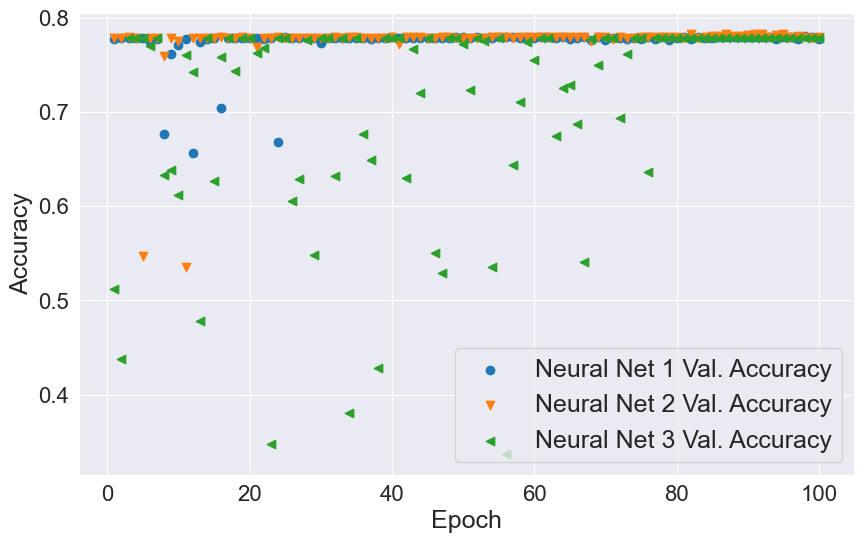

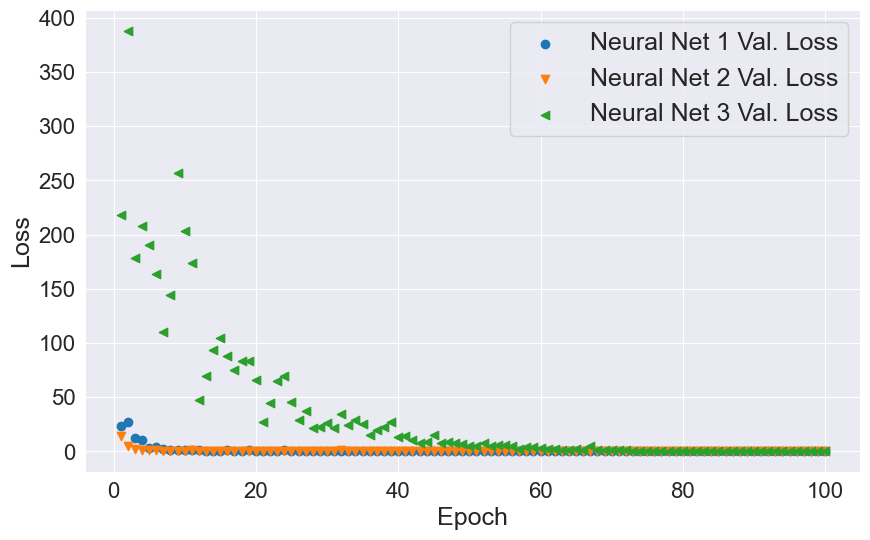

In [17]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], label = "Neural Net 1 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict2['val_accuracy'], marker='v', label = "Neural Net 2 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict3['val_accuracy'], marker='<', label = "Neural Net 3 Val. Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

plt.figure(figsize = (10,6))

plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], label = "Neural Net 1 Val. Loss")
plt.scatter(range(1,n_epochs+1), history_dict2['val_loss'], marker='v', label = "Neural Net 2 Val. Loss")
plt.scatter(range(1,n_epochs+1), history_dict3['val_loss'], marker='<', label = "Neural Net 3 Val. Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [18]:
np.round(100*accuracy_score(y_val, np.argmax(model2.predict(X_val), axis=1)),2)

94/94 [==============================] - 0s 2ms/step


77.93

In [19]:
np.round(100*accuracy_score(y_val, np.argmax(model.predict(X_val), axis=1)),2)

94/94 [==============================] - 0s 1ms/step


77.73

In [20]:
np.round(100*recall_score(y_val, np.argmax(model2.predict(X_val), axis=1)),2)

94/94 [==============================] - 0s 2ms/step


0.45

In [21]:
np.round(100*recall_score(y_val, np.argmax(model.predict(X_val), axis=1)),2)

94/94 [==============================] - 0s 1ms/step


1.81

In [22]:
np.round(100*accuracy_score(y_val, np.argmax(model3.predict(X_valpca), axis=1)),2)

94/94 [==============================] - 0s 1ms/step


77.87

In [23]:
np.round(100*recall_score(y_val, np.argmax(model3.predict(X_valpca), axis=1)),2)

94/94 [==============================] - 0s 1ms/step


0.0

In [24]:
feat = ['SEX_TE', 
           'EDUCATION_TE', 
           'MARRIAGE_TE', 
           'PAY_1_TE',
           'PAY_AMT1',
           'AGE_BY10_TE', 
           'AGE/LIM',  
           'AVE_PAY_AMT',
           'AVE_PAY_AMT/LIM',  
           'AVE_PAY/BILL', 
           'UNPAID_MONTHS']

In [25]:
max_features = 1000000

feat_train, feat_test, y_traint, y_test = train_test_split(df[feat], df['Y'],
                              test_size=0.1,
                              stratify=df["Y"],
                              shuffle=True,
                              random_state=123)


In [26]:
Rmodel = models.Sequential()

Rmodel.add( layers.Embedding(max_features, 256))
Rmodel.add( layers.LSTM(256, return_sequences = True))
Rmodel.add( layers.LSTM(256, return_sequences = True))
Rmodel.add( layers.LSTM(256, return_sequences = True))
Rmodel.add( layers.LSTM(256, return_sequences = True))
Rmodel.add( layers.LSTM(256, return_sequences = True))
Rmodel.add( layers.LSTM(256, return_sequences = False))

Rmodel.add(layers.Dense(1, activation = 'sigmoid'))

Rmodel.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])

epochs = 100

historyR = Rmodel.fit(feat_train, y_traint,
                         epochs = epochs,
                         batch_size = 500,
                         validation_data = (feat_test, y_test))

Epoch 1/100
54/54 [==============================] - 54s 842ms/step - loss: 0.5671 - accuracy: 0.7788 - val_loss: 0.5426 - val_accuracy: 0.7787
Epoch 2/100
54/54 [==============================] - 45s 827ms/step - loss: 0.5332 - accuracy: 0.7788 - val_loss: 0.5287 - val_accuracy: 0.7787
Epoch 3/100
54/54 [==============================] - 43s 805ms/step - loss: 0.5278 - accuracy: 0.7754 - val_loss: 0.5260 - val_accuracy: 0.7787
Epoch 4/100
54/54 [==============================] - 43s 805ms/step - loss: 0.4917 - accuracy: 0.7773 - val_loss: 0.5416 - val_accuracy: 0.7790
Epoch 5/100
54/54 [==============================] - 43s 800ms/step - loss: 0.4399 - accuracy: 0.7986 - val_loss: 0.5647 - val_accuracy: 0.7557
Epoch 6/100
54/54 [==============================] - 43s 804ms/step - loss: 0.4134 - accuracy: 0.8163 - val_loss: 0.5938 - val_accuracy: 0.7633
Epoch 7/100
54/54 [==============================] - 44s 808ms/step - loss: 0.3987 - accuracy: 0.8239 - val_loss: 0.5891 - val_accuracy:

In [27]:
history_dictR = historyR.history

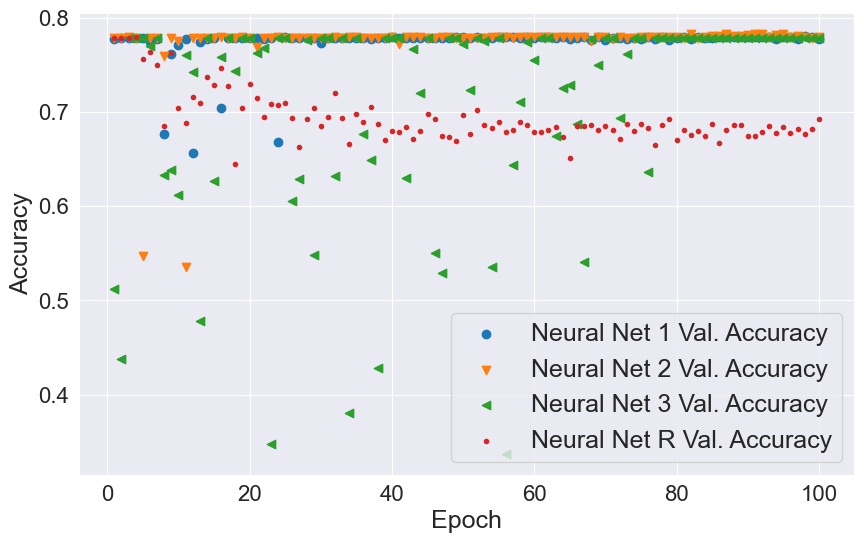

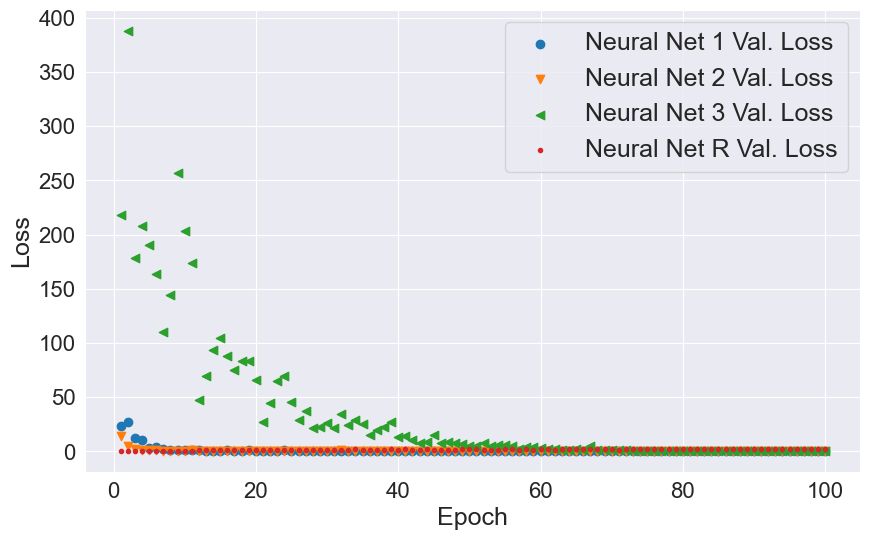

In [28]:
plt.figure(figsize = (10,6))

plt.scatter(range(1,n_epochs+1), history_dict['val_accuracy'], label = "Neural Net 1 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict2['val_accuracy'], marker='v', label = "Neural Net 2 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dict3['val_accuracy'], marker='<', label = "Neural Net 3 Val. Accuracy")
plt.scatter(range(1,n_epochs+1), history_dictR['val_accuracy'], marker='.', label = "Neural Net R Val. Accuracy")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Accuracy", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

plt.figure(figsize = (10,6))

plt.scatter(range(1,n_epochs+1), history_dict['val_loss'], label = "Neural Net 1 Val. Loss")
plt.scatter(range(1,n_epochs+1), history_dict2['val_loss'], marker='v', label = "Neural Net 2 Val. Loss")
plt.scatter(range(1,n_epochs+1), history_dict3['val_loss'], marker='<', label = "Neural Net 3 Val. Loss")
plt.scatter(range(1,n_epochs+1), history_dictR['val_loss'], marker='.', label = "Neural Net R Val. Loss")

plt.xlabel("Epoch", fontsize=18)
plt.ylabel("Loss", fontsize=18)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=18)

plt.show()

In [29]:
np.round(100*accuracy_score(y_val, np.argmax(Rmodel.predict(feat_test), axis=1)),2)

94/94 [==============================] - 4s 21ms/step


77.87

In [30]:
np.round(100*recall_score(y_val, np.argmax(Rmodel.predict(feat_test), axis=1)),2)

94/94 [==============================] - 2s 21ms/step


0.0